In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import scipy.stats as sts
import numpy as np

amplification_DF = pd.read_csv('amplification_DF_division.csv')
n_boots = 1000

Why some units show both amplification and quenching and some just quenching. Based on eye balling the data, it seemed that units with high baseline fano-factor show quenching. Let's quantify that at the population.

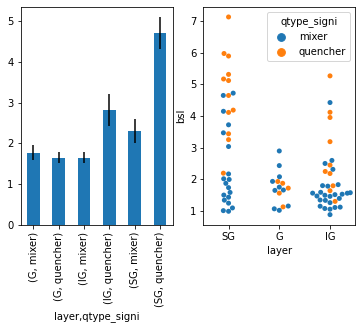

In [5]:
ax = plt.subplot(1,2,1)
SEM = amplification_DF.groupby(['layer','qtype_signi'])['bsl'].sem()
amplification_DF.groupby(['layer','qtype_signi'])['bsl'].mean().plot(kind='bar',yerr=SEM,ax=ax)

ax = plt.subplot(1,2,2)
sns.swarmplot(x='layer',y='bsl',data=amplification_DF,hue='qtype_signi',ax=ax)

lm = ols('bsl ~ C(qtype_signi) + C(layer)',data=amplification_DF).fit()
table = sm.stats.anova_lm(lm,typ=1)
print(table)